#               MOVIE RECOMENDATION SYSTEM CONTENT BASED 


Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies.Recommender systems produce a list of recommendations in any of the two ways

CONTENT-BASED FILTERING : A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

COLLABORATIVE FILTERING : To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

In this project we are recommending movies based on content filtering. I have used dataset of HOLLYWOOD FILMS.

The code is as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('movie_dataset.csv')

In [3]:
df.head()
# Data Visualization

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


<AxesSubplot:title={'center':'Distribution of Ratings for a Movie'}, xlabel='vote_average', ylabel='Movies'>

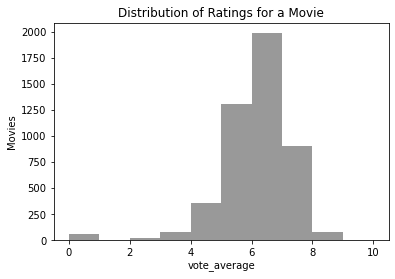

In [4]:
plt.title('Distribution of Ratings for a Movie')

plt.ylabel('Movies')
sns.distplot(df["vote_average"],bins=10,kde=False,color="black")


We can see that most of the movies are rated between 5 and 8

<AxesSubplot:title={'center':'Runtime of movies'}, xlabel='runtime', ylabel='Movies'>

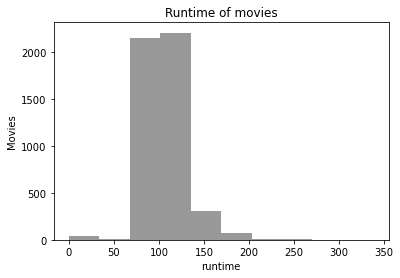

In [9]:
plt.title('Runtime of movies')
plt.ylabel('Movies')
sns.distplot(df['runtime'],bins=10,kde=False,color='black')


Most of the movies have the runtime between 80 minutes to 200 minutes

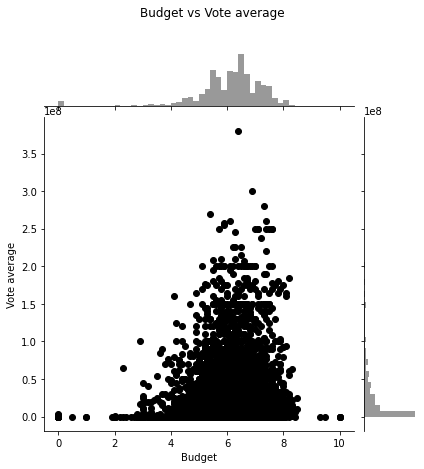

In [8]:

g=sns.jointplot(x='vote_average',y='budget',data=df,kind='scatter',color='black')
g.fig.suptitle('Budget vs Vote average',y=1.08)
g.set_axis_labels('Budget','Vote average')


Considering the features such as keywords cast genres and director a new column of combined features is created.

In [11]:
features=['keywords','genres','cast','director']#as this is content based recommendations
#we select columns that provide info about movie content

In [12]:
def combined_features(row):
    return row['keywords']+" "+row['genres']+" "+row['cast']+" "+row['director']
#we combine all the unique features to form a column vector

In [13]:
for feature in features:
    df[feature]=df[feature].fillna(" ") #all the null values are filled by " "(space)
print(df.columns)

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')


In [14]:

df["combined_features"]=df.apply(combined_features,axis=1)#we use apply to combine the keywords,geners,cast and director 
#column of every row to form a single column vector
df.combined_features.iloc[0]

'culture clash future space war space colony society Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'





Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [21]:
cv=CountVectorizer()# feeding the combined_features string into CountVectorizer 
count_matrix=cv.fit_transform(df["combined_features"])



Cosine similarity is a metric used to determine how similar two entities are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [17]:
cosine_sim=cosine_similarity(count_matrix)
print(cosine_sim)#automatically produces corelation matrix

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [22]:
# defining helping functions to get the movie index from its title and vise-versa

In [52]:
def get_title_from_index(index):
    return df[df.index==index]['title'].values[0]
def get_index_from_title(title):
    return df[df.title==title]["index"].values[0]

movie_user_likes variable can be altered to get the recommendations for other movies.

In [53]:

movie_user_likes="Avatar"# this is the movie liked by the user. Recommendations are made based on user liked movie.
movie_index=get_index_from_title(movie_user_likes)
similar_movies=list(enumerate(cosine_sim[movie_index]))# enumerate function is used to obtain the tuple (index,value)
print(list(enumerate(cosine_sim[movie_index])))

[(0, 1.0000000000000004), (1, 0.10540925533894599), (2, 0.12038585308576921), (3, 0.03774256780481986), (4, 0.23094010767585033), (5, 0.1924500897298753), (6, 0.0), (7, 0.1405456737852613), (8, 0.08206099398622181), (9, 0.11785113019775793), (10, 0.23094010767585035), (11, 0.07698003589195011), (12, 0.12038585308576921), (13, 0.11547005383792516), (14, 0.181848241863327), (15, 0.07548513560963972), (16, 0.1382602259640567), (17, 0.12309149097933272), (18, 0.1405456737852613), (19, 0.12309149097933272), (20, 0.11785113019775793), (21, 0.07856742013183862), (22, 0.08830215713766958), (23, 0.12909944487358055), (24, 0.06804138174397717), (25, 0.08606629658238704), (26, 0.21821789023599236), (27, 0.15713484026367724), (28, 0.15713484026367724), (29, 0.12309149097933272), (30, 0.1887128390240993), (31, 0.1924500897298753), (32, 0.10910894511799618), (33, 0.14547859349066158), (34, 0.0), (35, 0.16798421022632323), (36, 0.15713484026367724), (37, 0.21516574145596762), (38, 0.11322770341445959

In [56]:
print(sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]) # the values are sorted according to the cosine_sim values 
#which is the second datapoint of the tuple. Hence we use lambda x:x[1],where 1 is the second index of tuple.

sorted_similar_movies=sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:] #Since the movie liked by the user is 100% 
# correlated to the 1st value,we have to sort without that value. Also, we need to drop that value while showing recommendations
# Hence,we use [1:].

[(94, 0.42339019740572564), (2403, 0.3774256780481986), (3208, 0.3464101615137755), (47, 0.34426518632954817), (56, 0.33596842045264647), (3158, 0.33333333333333337), (2198, 0.31426968052735443), (2696, 0.30792014356780045), (4401, 0.28867513459481287), (1531, 0.2858966759567453), (278, 0.2810913475705226), (1053, 0.2809003238667948), (239, 0.2765204519281134), (838, 0.2749859704614352), (61, 0.27498597046143514), (232, 0.2694301256218254), (4332, 0.2694301256218254), (661, 0.264197974633739), (4593, 0.264197974633739), (3730, 0.2592592592592593), (1650, 0.2501595914621521), (158, 0.24618298195866545), (461, 0.24618298195866545), (1083, 0.24618298195866542), (322, 0.24077170617153845), (228, 0.24077170617153842), (539, 0.24077170617153842), (577, 0.23570226039551587), (1990, 0.23570226039551587), (1652, 0.23570226039551584), (10, 0.23094010767585035), (400, 0.23094010767585035), (4, 0.23094010767585033), (2129, 0.23094010767585033), (3184, 0.23094010767585033), (1259, 0.226804605813257

Based on the movie liked by the user the model recommends 5 similar movies to the user.

In [58]:
i=1
print("Top 5 similar movies to"+" "+movie_user_likes+" are :")
for elem in sorted_similar_movies:
    print(get_title_from_index(elem[0]))
    i=i+1
    if i>5 :
        break

Top 5 similar movies to Avatar are :
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
